(fa-model-1-notebook)=
# Il modello unifattoriale 

In [1]:
source("../_common.R")
suppressPackageStartupMessages({
    library("tidyverse")
    library("lavaan")
    library("lavaanPlot")
    library("lavaanExtra")
    library("semPlot")
    library("knitr")
    library("kableExtra")
    library("tidyr")
    library("corrplot")
})

Questo capitolo presenta le nozioni fondamentali dell'analisi fattoriale, un modello statistico che consente di spiegare le correlazioni tra variabili osservate mediante la loro saturazione in uno o più fattori generali. In questo modello, le $p$ variabili osservate (item) sono considerate condizionalmente indipendenti rispetto a $m$ variabili latenti chiamate fattori. L'obiettivo dell'analisi fattoriale è di interpretare questi fattori come costrutti teorici inosservabili. Ad esempio, l'analisi fattoriale può essere utilizzata per spiegare le correlazioni tra le prestazioni di un gruppo di individui in una serie di compiti mediante il concetto di intelligenza. In questo modo, l'analisi fattoriale aiuta a identificare i costrutti cui gli item si riferiscono e a stabilire in che misura ciascun item rappresenta il costrutto. Il modello può essere unifattoriale ($m = 1$) o multifattoriale ($m > 1$), e in questo capitolo si introdurrà il modello unifattoriale che assume l'esistenza di un unico fattore comune latente.

## Errore di misura

L'analisi fattoriale concettualizza ogni misura osservabile $y$ come risultante dalla combinazione lineare del punteggio reale associato al costrutto latente $\xi$, e di un elemento di errore di misura non osservato $\delta$. In questo contesto, il valore misurato di $y$ è interpretato come il prodotto del punteggio reale latente, ponderato da un coefficiente di carico fattoriale $\lambda$, a cui si aggiunge un termine di errore specifico di misura $\delta_y$. Per illustrare con un esempio pratico, nel caso di una bilancia non completamente affidabile, ogni lettura del peso corporeo riflette sia il peso effettivo che un errore di misura intrinseco alla bilancia, che si manifesta con variazioni aleatorie da una lettura all'altra. In questa situazione, il modello fattoriale può essere formalizzato attraverso l'equazione:

$$
y = \lambda\xi + \delta_{y}.
$$

Quando si analizzano multiple misure osservabili $y$ che rappresentano lo stesso costrutto latente $\xi$, diventa fattibile la stima del punteggio reale latente $\xi$ insieme alla componente di errore di misura $\delta$, migliorando così la comprensione e l'accuratezza dell'interpretazione dei dati.

## Modello monofattoriale

Con $p$ variabili manifeste $y_i$, il caso più semplice è quello di un solo fattore comune: 

$$
\begin{equation}
y_i = \mu_i + \lambda_{i} \xi +  1 \cdot \delta_i \qquad i=1, \dots, p,
\end{equation}
$$ (eq-mod-unifattoriale)

dove $\xi$ rappresenta il fattore comune a tutte le $y_i$, $\delta_i$ sono i fattori specifici o unici di ogni variabile osservata e $\lambda_i$ sono le saturazioni (o pesi) fattoriali le quali stabiliscono il peso del fattore latente su ciascuna variabile osservata.

Il modello di analisi fattoriale e il modello di regressione possono sembrare simili, ma presentano alcune differenze importanti. In primo luogo, sia il fattore comune $\xi$ sia i fattori specifici $\delta_i$ sono inosservabili, il che rende tutto ciò che si trova a destra dell'uguaglianza incognito. In secondo luogo, l'analisi di regressione e l'analisi fattoriale hanno obiettivi diversi. L'analisi di regressione mira a individuare le variabili esplicative, osservabili direttamente, che sono in grado di spiegare la maggior parte della varianza della variabile dipendente. Al contrario, il problema dell'analisi unifattoriale consiste nell'identificare la variabile esplicativa inosservabile che è in grado di spiegare la maggior parte della covarianza tra le variabili osservate.

Solitamente, per comodità, si assume che la media delle variabili osservate $y_i$ sia zero, ovvero $\mu_i=0$. Ciò equivale a considerare gli scarti delle variabili rispetto alle rispettive medie. Il modello unifattoriale assume che le variabili osservate siano il risultato della combinazione lineare di un fattore comune $\xi$ e dei fattori specifici $\delta_i$, ovvero:

$$
\begin{equation}
y_i -\mu_i = \lambda_i \xi + 1 \cdot \delta_i,
\end{equation}
$$(eq-mod-monofattoriale)

dove $\lambda_i$ è la saturazione o il peso della variabile $i$-esima sul fattore comune e $\delta_i$ rappresenta il fattore specifico della variabile $i$-esima. Si assume che il fattore comune abbia media zero e varianza unitaria, mentre i fattori specifici abbiano media zero, varianza $\psi_{i}$ e siano incorrelati tra loro e con il fattore comune. Nel modello unifattoriale, l'interdipendenza tra le variabili è completamente spiegata dal fattore comune.

Le ipotesi precedenti consentono di ricavare la covarianza tra la variabile osservata $y_i$ e il fattore comune, la varianza della variabile osservata $y_i$ e la covarianza tra due variabili osservate $y_i$ e $y_k$. L'obiettivo della discussione in questo capitolo è appunto quello di analizzare tali grandezze statistiche.

## Correlazione parziale

Prima di entrare nel dettaglio del modello statistico dell'analisi fattoriale, è importante chiarire il concetto di correlazione parziale. Si attribuisce spesso a Charles Spearman la nascita dell'analisi fattoriale. Nel 1904, Spearman pubblicò un articolo intitolato "General Intelligence, Objectively Determined and Measured" in cui propose la Teoria dei Due Fattori. In questo articolo, dimostrò come fosse possibile identificare un fattore inosservabile a partire da una matrice di correlazioni, utilizzando il metodo dell'annullamento della tetrade (*tetrad differences*). L'annullamento della tetrade è un'applicazione della teoria della correlazione parziale che mira a stabilire se, controllando un insieme di variabili inosservabili chiamate fattori $\xi_j$, le correlazioni tra le variabili osservabili $Y_i$, al netto degli effetti lineari delle $\xi_j$, diventino statisticamente nulle.

Possiamo considerare un esempio con tre variabili: $Y_1$, $Y_2$ e $F$. La correlazione tra $Y_1$ e $Y_2$, $r_{1,2}$, può essere influenzata dalla presenza di $F$. Per calcolare la correlazione parziale tra $Y_1$ e $Y_2$ al netto dell'effetto lineare di $F$, dobbiamo trovare le componenti di $Y_1$ e $Y_2$ che sono linearmente indipendenti da $F$.

Per fare ciò, dobbiamo trovare la componente di $Y_1$ che è ortogonale a $F$. Possiamo calcolare i residui $E_1$ del modello:

$$
Y_1 = b_{01} + b_{11}F + E_1.
$$

La componente di $Y_1$ linearmente indipendente da $F$ è quindi data dai residui $E_1$. Possiamo eseguire un'operazione analoga per $Y_2$ per trovare la sua componente ortogonale a $F$. Calcolando la correlazione tra le due componenti così ottenute si ottiene la correlazione parziale tra $Y_1$ e $Y_2$ al netto dell'effetto lineare di $F$.

L'eq. {eq}`eq-corr-parz` consente di calcolare la correlazione parziale tra $Y_1$ e $Y_2$ al netto dell'effetto di $F$ a partire dalle correlazioni semplici tra le tre variabili $Y_1$, $Y_2$ e $F$. 

$$
\begin{equation}
r_{1,2 \mid F} = \frac{r_{12} - r_{1F}r_{2F}}{\sqrt{(1-r_{1F}^2)(1-r_{2F}^2)}}.
\end{equation}
$$(eq-corr-parz)

In particolare, la correlazione parziale $r_{1,2 \mid F}$ è data dalla differenza tra la correlazione $r_{12}$ tra $Y_1$ e $Y_2$ e il prodotto tra le correlazioni $r_{1F}$ e $r_{2F}$ tra ciascuna delle due variabili e $F$, il tutto diviso per la radice quadrata del prodotto delle differenze tra 1 e i quadrati delle correlazioni tra $Y_1$ e $F$ e tra $Y_2$ e $F$. In altre parole, la formula tiene conto dell'effetto di $F$ sulle correlazioni tra $Y_1$ e $Y_2$ per ottenere una stima della relazione diretta tra le due variabili, eliminando l'effetto del fattore comune.

Consideriamo un esempio numerico. Sia $f$ una variabile su cui misuriamo $n$ valori

In [10]:
set.seed(123)
n <- 1000
f <- rnorm(n, 24, 12)

Siano $y_1$ e $y_2$ funzioni lineari di $f$, a cui viene aggiunta una componente d'errore gaussiano:

In [11]:
y1 <- 10 + 7 * f + rnorm(n, 0, 50)
y2 <- 3  + 2 * f + rnorm(n, 0, 50)

La correlazione tra $y_1$ e $y_2$ ($r_{12}= 0.355$) deriva dal fatto che $\hat{y}_1$ e $\hat{y}_2$ sono entrambe funzioni lineari di $f$:

In [12]:
Y <- cbind(y1, y2, f)
R <- cor(Y)
round(R, 3)

,y1,y2,f
y1,1.000,0.380,0.867
y2,0.380,1.000,0.423
f,0.867,0.423,1.000


Eseguiamo le regressioni di $y_1$ su $f$ e di $y_2$ su $F$:

In [13]:
fm1 <- lm(y1 ~ f)
fm2 <- lm(y2 ~ f)

Nella regressione, ciascuna osservazione $y_{i1}$ viene scomposta in due componenti linearmente indipendenti, i valori adattati $\hat{y}_{i}$ e i residui, $e_{i}$: $y_i = \hat{y}_i + e_1$. Nel caso di $y_1$ abbiamo

In [14]:
round(head(cbind(y1, y1.hat=fm1$fit, e=fm1$res, fm1$fit+fm1$res)), 3)

,y1,y1.hat,e,
1,81.130,130.505,-49.375,81.130
2,106.667,159.704,-53.037,106.667
3,308.032,317.846,-9.813,308.032
4,177.314,186.285,-8.971,177.314
5,61.393,191.482,-130.089,61.393
6,374.094,331.668,42.426,374.094


Lo stesso può dirsi di $y_2$. La correlazione parziale $r_{12 \mid f}$
tra $y_1$ e $y_2$ dato $f$ è uguale alla correlazione di Pearson tra i
residui $e_1$ e $e_2$ calcolati mediante i due modelli di regressione
descritti sopra:

In [15]:
cor(fm1$res, fm2$res)

[1] 0.02828618

La correlazione parziale tra $y_1$ e $y_2$ al netto di $f$ è .02829.

Per i dati esaminati sopra, dunque, la correlazione parziale tra le
variabili $y_1$ e $y_2$ diventa uguale a zero se la variabile $f$ viene
controllata (ovvero, se escludiamo da $y_1$ e da $y_2$ l'effetto lineare
di $f$). Il fatto che la correlazione parziale sia zero significa che la
correlazione che abbiamo osservato tra $y_1$ e $y_2$ ($r = 0.355$) non
dipendeva dall'effetto che una variabile $y$ esercitava sull'altra, ma
bensì dal fatto che c'era una terza variabile, $f$, che influenzava sia
$y_1$ sia $y_2$. In altre parole, le variabili $y_1$ e $y_2$ sono
condizionalmente indipendenti dato $f$. Ciò significa, come abbiamo
visto sopra, che la componente di $y_1$ linearmente indipendente da $f$
è incorrelata con la componente di $y_2$ linearmente indipendente da
$f$.

La correlazione che abbiamo calcolato tra i residui di due modelli di
regressione è identica alla correlazione che viene calcolata
applicando l'eq. {eq}`eq-corr-parz`:

In [16]:
(R[1, 2] - R[1, 3] * R[2, 3]) / 
  sqrt((1 - R[1, 3]^2) * (1- R[2, 3]^2)) %>% 
  round(3)

[1] 0.02827513

## Principio base dell'analisi fattoriale

Attualmente, l'inferenza statistica nell'analisi fattoriale spesso si svolge mediante il calcolo di stime della massima verosimiglianza ottenute mediante procedure iterative. All'inizio dell'analisi fattoriale, tuttavia, la procedura di estrazione dei fattori faceva leva sulle relazioni invarianti che il modello fattoriale impone agli elementi della matrice di covarianza delle variabili osservate. Il più conosciuto tra tali invarianti è la *tetrade* che si presenta nei modelli ad un fattore.

La tetrade è una combinazione di quattro correlazioni. Se l'associazione osservata tra le variabili dipende effettivamente dal fatto che le  variabili in questione sono state causalmente generate da un fattore comune inosservabile, allora è possibile generare una combinazione delle correlazioni tra le variabili che porta all'annullamento della tetrade. In altre parole, l'analisi fattoriale si chiede se esiste un insieme esiguo di $m<p$ variabili inosservabili che rendono significativamente nulle tutte le correlazioni parziali tra le $p$ variabili osservate al netto dei fattori comuni. Se il metodo della correlazione parziale consente di identificare $m$ variabili latenti, allora lo psicologo conclude che tali fattori corrispondono agli $m$ costrutti che intende misurare.

Per chiarire il metodo dell'annullamento della tetrade consideriamo la matrice di correlazioni riportata nella Tabella successiva. Nella tabella, la correlazione parziale tra ciascuna coppia di variabili 
$y_i$, $y_j$ (con $i \neq j$) dato $\xi$ è sempre uguale a zero. Ad esempio, la correlazione parziale tra $y_3$ e $y_5$ dato $\xi$ è:

$$
\begin{align}
  r_{35 \mid \xi} &= \frac{r_{35} - r_{3\xi}r_{5\xi}}
  {\sqrt{(1-r_{3\xi}^2)(1-r_{5\xi}^2)}} \notag \\[12pt]
  &= \frac{0.35 - 0.7 \times 0.5}
  {\sqrt{(1-0.7^2)(1-0.5^2)}} = 0. \notag
\end{align}
$$

Lo stesso risultato si trova per qualunque altra coppia di variabili $y_i$ e $y_j$, ovvero $r_{ij \mid \xi} = 0$.

|       | $\xi$ | $y_1$ | $y_2$ | $y_3$ | $y_4$ | $y_5$ |
|-------|-------|-------|-------|-------|-------|-------|
| $\xi$ | **1.00** |       |       |       |       |       |
| $y_1$ | **0.90** | 1.00  |       |       |       |       |
| $y_2$ | **0.80** | 0.72  | 1.00  |       |       |       |
| $y_3$ | **0.70** | 0.63  | 0.56  | 1.00  |       |       |
| $y_4$ | **0.60** | 0.54  | 0.48  | 0.42  | 1.00  |       |
| $y_5$ | **0.50** | 0.45  | 0.40  | 0.35  | 0.30  | 1.00  |
  
Possiamo dunque dire che, per la matrice di correlazioni della Tabella, esiste un'unica variabile $\xi$ la quale, quando viene controllata, spiega tutte le 

$$p(p-1)/2 = 5(5-1)/2=10$$ 

correlazioni tra le variabili $y$. Questo risultato non è sorprendente, in quanto la  matrice di correlazioni della Tabella è stata costruita in modo tale da possedere tale proprietà.

Ma supponiamo di essere in una situazione diversa, ovvero di avere osservato soltanto le variabili $y_i$ e di non conoscere $\xi$. In tali circostanze ci possiamo porre la seguente domanda: Esiste una variabile inosservabile $\xi$ la quale, se venisse controllata, renderebbe uguali a zero tutte le correlazioni parziali tra le variabili $y$? Se una tale variabile inosservabile esiste, ed è in grado di spiegare tutte le correlazioni tra le variabili osservate $y$, allora essa viene chiamata *fattore*. Arriviamo dunque alla seguente definizione: 

Un fattore è una variabile inosservabile in grado di rendere significativamente nulle tutte le correlazioni parziali tra le variabili manifeste.

## Vincoli sulle correlazioni

Come si può stabilire se esiste una variabile inosservabile in grado di rendere nulle tutte le correlazioni parziali tra le variabili osservate? Riscriviamo l'Eq. {eq}`eq-corr-parz` per specificare la correlazione parziale tra le variabili $y_i$ e $y_j$ dato $\xi$:

$$
\begin{align}
  r_{ij \mid \xi} &= \frac{r_{ij} - r_{i\xi}r_{j\xi}}
  {\sqrt{(1-r_{i\xi}^2)(1-r_{j\xi}^2)}} 
\end{align}
$$

Affinché $r_{ij \mid \xi}$ sia uguale a zero è necessario che

$$
r_{ij} - r_{i\xi}r_{j\xi}=0
$$

ovvero

$$
\begin{equation}
r_{ij} = r_{i\xi}r_{j\xi}.
\end{equation}
$$

In altri termini, se esiste un fattore non osservato $\xi$ in grado di rendere uguali a zero tutte le correlazioni parziali $r_{ih \mid \xi}$, allora la correlazione tra ciascuna coppia di variabili $y$ deve essere uguale al prodotto delle correlazioni tra ciascuna $y$ e il fattore latente $\xi$. Questo è il principio base dell'analisi fattoriale. 

## Teoria dei Due Fattori

Per fare un esempio concreto relativo al metodo dell'annullamento della tetrade, esaminiamo la matrice di correlazioni originariamente analizzata da Spearman. Spearman (1904) raccolse alcune misure di capacità intellettuale su un piccolo numero di studenti di una scuola superiore. Nello specifico, esaminò i voti di tali studenti nelle seguenti materie: studio dei classici ($c$), letteratura inglese ($e$) e abilità matematiche ($m$). Considerò anche la prestazione in un compito di discriminazione dell'altezza di suoni ("pitch discrimination") ($p$), ovvero un'abilità diversa da quelle richieste nei test scolastici.  

Secondo la Teoria dei Due Fattori, le prestazioni relative ad un determinato compito intellettuale possiedono una componente comune (detta fattore 'g') con le prestazioni in un qualunque altro compito intellettuale e una componente specifica a quel determinato compito. Il modello dell'intelligenza di Spearman prevede dunque due fattori, uno generale e uno specifico (detto fattore 's'). Il fattore 'g' costituisce la componente invariante dell'abilità intellettiva, mente il fattore 's' è una componente che varia da condizione a condizione. 

Come è possibile stabilire se esiste una variabile latente in grado di spiegare le correlazioni tra le variabili osservate da Spearman? Lo strumento proposto da Spearman per rispondere a questa domanda è *l'annullamento della tetrade*. L'annullamento della tetrade utilizza i vincoli sulle correlazioni che derivano dalla definizione di correlazione parziale. In precedenza abbiamo visto che la correlazione parziale tra le variabili $y$ indicizzate da $i$ e $j$, al netto dell'effetto di $\xi$, è nulla se

$$
r_{ij} = r_{i\xi}r_{j\xi}.
$$

Nel caso dei dati di Spearman, dunque, le correlazioni parziali sono nulle se 
la correlazione tra ''studi classici'' e ''letteratura inglese'' è uguale al prodotto della correlazione tra ''studi classici'' e il fattore $\xi$ e della correlazione tra ''letteratura inglese'' e il fattore $\xi$. Inoltre, la correlazione tra ''studi classici'' e ''abilità matematica'' deve essere uguale al prodotto della correlazione tra ''studi classici'' e il fattore $\xi$ e della correlazione tra ''abilità matematica'' e il fattore $\xi$; e così via.

Le correlazioni tra le variabili manifeste e il fattore latente sono dette \textit{saturazioni fattoriali} e vengono denotate con la lettera $\lambda$. Se il modello di Spearman è corretto, avremo che

$$r_{ec}=\lambda_e \times \lambda_{c},$$ 

dove $r_{ec}$ è la correlazione tra ''letteratura inglese'' (e) e ''studi classici'' (c), $\lambda_e$ è la correlazione tra ''letteratura inglese'' e $\xi$, e $\lambda_{c}$ è la correlazione tra ''studi classici'' e $\xi$. 

Allo stesso modo, la correlazione tra ''studi classici'' e ''matematica'' (m) dovrà essere uguale a 

$$\lambda_c \times \lambda_m,$$ 

eccetera. 

## Annullamento della tetrade

Date le correlazioni tra tre coppie di variabili manifeste, il metodo dell'annullamento della tetrade

> in una matrice di correlazione, si selezionino quattro coefficienti nelle posizioni che marcano gli angoli di un rettangolo. La differenza tra i prodotti dei coefficienti che giacciono sulle due diagonali di tale rettangolo costituisce la differenza delle tetradi e deve essere uguale a zero.

rende possibile stimare i valori delle saturazioni fattoriali $\lambda$. Ad esempio, per le variabili $c$, $m$ ed $e$, possiamo scrivere le seguenti tre equazioni in tre incognite:

$$
\begin{align}
  r_{cm} &= \lambda_c \times \lambda_m, \notag \\
  r_{em} &= \lambda_e \times \lambda_m,  \\
  r_{ce} &= \lambda_c \times \lambda_e. \notag
\end{align}
$$

Risolvendo il precedente sistema di equazioni lineari, il coefficiente di saturazione $\lambda_m$ della variabile $y_m$ nel fattore comune $\xi$, ad esempio, pu{\`o} essere calcolato a partire dalle correlazioni tra le variabili manifeste $c$, $m$, ed $e$ nel modo seguente\footnote{
La terza delle equazioni del sistema lineare può essere riscritta come $\lambda_c = \frac{r_{ce}}{\lambda_e}$.

Utilizzando tale risultato, la prima equazione diventa $r_{cm} = \frac{r_{ce}}{\lambda_e}\lambda_m$. 
Dalla seconda equazione otteniamo $\lambda_e = \frac{r_{em}}{\lambda_m}$. Sostituendo questo risultato nell'equazione precedente otteniamo $r_{cm} = \frac{r_{ce}}{r_{em}}\lambda_m^2$, quindi $\lambda_m^2 = \frac{r_{cm} r_{em} }{r_{ce}}$.

Verifichiamo: $\frac{r_{cm} r_{em}}{r_{ce}} = \frac{\lambda_c \lambda_m \lambda_e \lambda_m}{\lambda_c \lambda_e} = \lambda_m^2$. 

$$
\begin{align}
  \lambda_m &= \sqrt{
    \frac{r_{cm} r_{em}}{r_{ce}}
    }. 
\end{align}
$$ (eq-tetradi)

Lo stesso vale per le altre due saturazioni $\lambda_c$ e $\lambda_e$.

Nel suo articolo del 1904, Spearman osservò le seguenti correlazioni tra 
le variabili $Y_c$, $Y_e$, $Y_m$ e $Y_p$:

$$
\begin{array}{ccccc}
  \hline
    & Y_C & Y_E & Y_M & Y_P \\
  \hline
  Y_C & 1.00 & 0.78 & 0.70 & 0.66 \\
  Y_E &   & 1.00 & 0.64 & 0.54 \\
  Y_M &   &   & 1.00 & 0.45 \\
  Y_P &   &   &   & 1.00 \\
  \hline
\end{array}
$$

Utilizzando l'Eq. {eq}`eq-tetradi`, mediante le correlazioni $r_{cm}$, $r_{em}$, e $r_{ce}$ fornite dalla tabella precedente, la saturazione $\lambda_m$ diventa uguale a:

$$
\begin{align}
  \hat{\lambda}_m &= \sqrt{ \frac{r_{cm} r_{em}}{r_{ce}} } = \sqrt{
    \frac{0.70 \times 0.64}{0.78} } = 0.76. \notag
\end{align}
$$

È importante notare che il metodo dell'annullamento della tetrade produce risultati falsificabili. 
Infatti, ci sono modi diversi per calcolare la stessa saturazione fattoriale. 
Se il modello fattoriale è corretto si deve ottenere lo stesso risultato in tutti i casi.  
Nel caso presente, la saturazione fattoriale $\lambda_m$ può essere calcolata in altri due modi:

$$
\begin{align}
  \hat{\lambda}_m &= \sqrt{ \frac{r_{cm} r_{mp}}{r_{cp}} } = \sqrt{ \frac{0.78 \times 0.45}{0.66} } = 0.69, \notag \\
  \hat{\lambda}_m &= \sqrt{ \frac{r_{em} r_{mp}}{r_{ep}} } = \sqrt{
    \frac{0.64 \times 0.45}{0.54} } = 0.73. \notag
\end{align}
$$

I tre valori che sono stati ottenuti sono molto simili. Qual è allora la stima migliore di  $\lambda_m$? 

## Metodo del centroide

La soluzione più semplice è quella di fare la media di questi tre valori ($\bar{\lambda}_m = 0.73$). 
Un metodo migliore (meno vulnerabile ai valori anomali) è dato dal rapporto tra la
somma dei numeratori e dei denominatori:

$$
\begin{align}
  \hat{\lambda}_m &= \sqrt{ \frac{0.70 \times 0.64 + 0.78 \times 0.45 + 0.64
      \times 0.45}{0.78+0.66+0.54} } = 0.73 \notag
\end{align}
$$

In questo caso, i due metodi danno lo stesso risultato. Le altre tre saturazioni fattoriali
trovate mediante il metodo del centroide sono: 

$$\hat{\lambda}_c = 0.97, \quad \hat{\lambda}_e = 0.84, \quad \hat{\lambda}_p = 0.65.$$ 

In conclusione, 

$$
\boldsymbol{\hat{\Lambda}}'=
(\hat{\lambda}_c, \hat{\lambda}_e, \hat{\lambda}_m, \hat{\lambda}_p) = (0.97, 0.84, 0.73, 0.65).
$$ 

Questo risultato è la soluzione proposta da Spearman nel suo articolo del 1904 per risolvere il problema di determinare le saturazioni fattoriali di un modello con un fattore comune latente.

## Introduzione a `lavaan`

Attualmente, l'analisi fattoriale viene svolta mediante software. Il pacchetto R più ampiamente utilizzato per condurre l'analisi fattoriale è `lavaan`. 

### Sintassi del modello

Al cuore del pacchetto `lavaan` si trova la "sintassi del modello". La sintassi del modello è una descrizione del modello da stimare. In questa sezione, spieghiamo brevemente gli elementi della sintassi del modello `lavaan`. 

Nell'ambiente R, una formula di regressione ha la seguente forma:

```
y ~ x1 + x2 + x3 + x4
```

In questa formula, la tilde ("~") è l'operatore di regressione. Sul lato sinistro dell'operatore, abbiamo la variabile dipendente (y), e sul lato destro abbiamo le variabili indipendenti, separate dall'operatore "+" . In `lavaan`, un modello tipico è semplicemente un insieme (o sistema) di formule di regressione, in cui alcune variabili (che iniziano con una 'f' qui sotto) possono essere latenti. Ad esempio:

```
y ~ f1 + f2 + x1 + x2
f1 ~ f2 + f3
f2 ~ f3 + x1 + x2
```

Se abbiamo variabili latenti in una qualsiasi delle formule di regressione, dobbiamo "definirle" elencando i loro indicatori (manifesti o latenti). Lo facciamo utilizzando l'operatore speciale "=~", che può essere letto come "è misurato da". Ad esempio, per definire le tre variabili latenti f1, f2 e f3, possiamo usare la sintassi seguente:

```
f1 =~ y1 + y2 + y3
f2 =~ y4 + y5 + y6
f3 =~ y7 + y8 + y9 + y10
```

Inoltre, le varianze e le covarianze sono specificate utilizzando un operatore "doppia tilde", ad esempio:

```
y1 ~~ y1 # varianza
y1 ~~ y2 # covarianza
f1 ~~ f2 # covarianza
```

E infine, le intercette per le variabili osservate e latenti sono semplici formule di regressione con solo una intercetta (esplicitamente indicato dal numero "1") come unico predittore:

```
y1 ~ 1
f1 ~ 1
```

Utilizzando questi quattro tipi di formule, è possibile descrivere una vasta gamma di modelli di variabili latenti. L'attuale insieme di tipi di formula è riassunto nella tabella sottostante.

| tipo di formula | operatore |  mnemonic |
| --------------- | --------- | --------- |
| definizione variabile latente | =~ | è misurato da |
| regressione | ~ | viene regredito su |
| (co)varianza (residuale) | ~~  |è correlato con |
| intercetta | ~ 1 | intercetta |

Una sintassi completa del modello lavaan è semplicemente una combinazione di questi tipi di formule, racchiusi tra virgolette singole. Ad esempio:

```
my_model <- ' 
  # regressions
  y1 + y2 ~ f1 + f2 + x1 + x2
  f1 ~ f2 + f3
  f2 ~ f3 + x1 + x2

  # latent variable definitions 
  f1 =~ y1 + y2 + y3 
  f2 =~ y4 + y5 + y6 
  f3 =~ y7 + y8 + y9
  
  # variances and covariances 
  y1 ~~ y1 
  y1 ~~ y2 
  f1 ~~ f2

  # intercepts 
  y1 ~ 1 
  f1 ~ 1
'
```

Per adattare il modello ai dati usiamo la seguente sintassi.

```
fit <- cfa(model = my_model, data = my_data)
```

### Un esempio concreto

Analizziamo nuovamente i dati di Spearman che abbiamo esaminato in precedenza usando `lavaan`. La matrice completa dei dati di Spearman è messa a disposizione da @kan2019extending. 

Specifichiamo il nome delle variabili manifeste

In [2]:
varnames <- c(
  "Classics", "French", "English", "Math", "Pitch", "Music"
)

e il loro numero

In [3]:
ny <- length(varnames)

Creiamo la matrice di correlazione:

In [4]:
spearman_cor_mat <- matrix(
  c(
    1.00,  .83,  .78,  .70,  .66,  .63,
     .83, 1.00,  .67,  .67,  .65,  .57,
     .78,  .67, 1.00,  .64,  .54,  .51,
     .70,  .67,  .64, 1.00,  .45,  .51,
     .66,  .65,  .54,  .45, 1.00,  .40,
     .63,  .57,  .51,  .51,  .40, 1.00
  ),
  ny, ny,
  byrow = TRUE,
  dimnames = list(varnames, varnames)
)

Specifichiamo l'ampiezza campionaria:

In [5]:
n <- 33

Definiamo il modello unifattoriale in `lavaan`. L'operatore `=~` si può leggere dicendo che la variabile latente a sinistra dell'operatore viene identificata dalle variabili manifeste elencate a destra dell'operatore e separate dal segno `+`. Per il caso presente, il modello dei due fattori di Spearman può essere specificato come segue.

In [6]:
spearman_mod <- "
  g =~ Classics + French + English + Math + Pitch + Music
"

Adattiamo il modello ai dati con la funzione `cfa()`:

In [7]:
fit1 <- lavaan::cfa(
  spearman_mod,
  sample.cov = spearman_cor_mat,
  sample.nobs = n,
  std.lv = TRUE
)

La funzione cfa() è una funzione dedicata per adattare modelli di analisi fattoriale confermativa. Il primo argomento è il modello specificato dall'utente. Il secondo argomento è il dataset che contiene le variabili osservate. L'argomento `std.lv = TRUE` specifica che imponiamo una varianza pari a 1 a tutte le variabili latenti comuni (nel caso presente, solo una). Ciò consente di  stimare le saturazioni fattoriali.

Una volta adattato il modello, la funzione summary() ci consente di esaminare la soluzione ottenuta:

In [8]:
out = summary(
  fit1, 
  fit.measures = TRUE, 
  standardized = TRUE
)
print(out)

lavaan 0.6.17 ended normally after 23 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        12

  Number of observations                            33

Model Test User Model:
                                                      
  Test statistic                                 2.913
  Degrees of freedom                                 9
  P-value (Chi-square)                           0.968

Model Test Baseline Model:

  Test statistic                               133.625
  Degrees of freedom                                15
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000
  Tucker-Lewis Index (TLI)                       1.086

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -212.547
  Loglikelihood unrestricted model (H1)       -2

L'output consiste in tre parti. Le prime nove righe sono chiamate intestazione. L'intestazione contiene le seguenti informazioni:

- il numero di versione di lavaan
- se l'ottimizzazione è terminata normalmente o meno e quante iterazioni sono state necessarie
- lo stimatore utilizzato (qui: ML, per la massima verosimiglianza)
- l'ottimizzatore utilizzato per trovare i valori dei parametri di adattamento migliori per questo stimatore (qui: NLMINB)
- il numero di parametri del modello (qui: 12)
- il numero di osservazioni che sono state effettivamente utilizzate nell'analisi (qui: 33)
- una sezione chiamata "Model Test User Model": che fornisce una statistica di test, i gradi di libertà e un valore p per il modello specificato dall'utente.

La sezione successiva contiene ulteriori misure di adattamento e viene mostrata solo se si utilizza l'argomento opzionale fit.measures = TRUE. Inizia con la riga Model Test Baseline Model: e termina con il valore per l'SRMR. L'ultima sezione contiene le stime dei parametri. Inizia con informazioni (tecniche) sul metodo utilizzato per calcolare gli errori standard. Quindi, vengono elencati tutti i parametri liberi (e fissati) inclusi nel modello. Di solito, prima vengono mostrate le variabili latenti, seguite dalle covarianze e dalle varianze (residui). La prima colonna (Stima) contiene il valore del parametro (stimato o fisso) per ogni parametro del modello; la seconda colonna (Std.err) contiene l'errore standard per ogni parametro stimato; la terza colonna (Z-value) contiene la statistica di Wald (che viene semplicemente ottenuta dividendo il valore del parametro per il suo errore standard), e l'ultima colonna (P(>|z|)) contiene il valore p per testare l'ipotesi nulla che il valore del parametro sia uguale a zero nella popolazione.

1. **Estimate**: Questo valore rappresenta lo **stimatore di massima verosimiglianza** per i pesi dei percorsi tra il costrutto latente (nel caso presente, il costrutto `g`) e le variabili osservate (le variabili manifeste: `Classics`, `French`, `English`, `Math`, `Pitch`, `Music`). In sostanza, è il peso del collegamento tra il costrutto latente e ciascuna delle variabili osservate nel modello.

2. **Std.lv**: Questi valori rappresentano le stime dei coefficienti standardizzate rispetto alle variabili latenti. La standardizzazione avviene dividendo la stima del coefficiente non standardizzato per la deviazione standard della variabile latente. Ciò rende possibile confrontare direttamente i coefficienti all'interno del modello perché rimuove le unità di misura, facendo in modo che i coefficienti siano espressi in termini di deviazioni standard. Tuttavia, questa standardizzazione è parziale perché considera solo la varianza della variabile latente.

3. **Std.all**: Questi valori rappresentano le stime dei coefficienti completamente standardizzate, cioè standardizzate sia rispetto alle variabili latenti che a quelle osservate. Ciò significa che sia la variabile dipendente (latente) sia le variabili indipendenti (osservate) sono state standardizzate prima di calcolare i coefficienti. Questo processo di standardizzazione completa permette un confronto diretto dei coefficienti all'interno del modello indipendentemente dalle unità di misura originali, rendendoli espressi in termini di quanti deviazioni standard la variabile dipendente cambia per ogni deviazione standard di cambiamento nella variabile indipendente.

Si noti che nella sezione Varianze: c'è un punto prima dei nomi delle variabili osservate. Ciò perché sono variabili dipendenti (o endogene) (predette dalle variabili latenti) e quindi il valore della varianza stampato in output è una stima della varianza residua: la varianza rimanente che non è spiegata dal/i predittore/i. Al contrario, non c'è un punto prima dei nomi delle variabili latenti, perché in questo modello sono variabili esogene. I valori delle varianze qui sono le varianze totali stimate delle variabili latenti.

È possibile semplificare l'output dalla funzione `summary()` in maniera tale da stampare solo la tabella completa delle stime dei parametri e degli errori standard. Qui usiamo `coef(fit1)`.

In [9]:
print(round(coef(fit1), 2))

       g=~Classics          g=~French         g=~English            g=~Math 
              0.94               0.86               0.79               0.73 
          g=~Pitch           g=~Music Classics~~Classics     French~~French 
              0.68               0.64               0.08               0.23 
  English~~English         Math~~Math       Pitch~~Pitch       Music~~Music 
              0.34               0.43               0.51               0.56 


Usando `parameterEstimates`, l'output diventa il seguente.

In [25]:
out = parameterEstimates(fit1, standardized = TRUE)
print(out)

        lhs op      rhs   est    se     z pvalue ci.lower ci.upper std.lv
1         g =~ Classics 0.942 0.129 7.314  0.000    0.689    1.194  0.942
2         g =~   French 0.857 0.137 6.239  0.000    0.588    1.127  0.857
3         g =~  English 0.795 0.143 5.545  0.000    0.514    1.076  0.795
4         g =~     Math 0.732 0.149 4.923  0.000    0.441    1.024  0.732
5         g =~    Pitch 0.678 0.153 4.438  0.000    0.379    0.978  0.678
6         g =~    Music 0.643 0.155 4.142  0.000    0.339    0.948  0.643
7  Classics ~~ Classics 0.083 0.051 1.629  0.103   -0.017    0.183  0.083
8    French ~~   French 0.234 0.072 3.244  0.001    0.093    0.376  0.234
9   English ~~  English 0.338 0.094 3.610  0.000    0.154    0.522  0.338
10     Math ~~     Math 0.434 0.115 3.773  0.000    0.208    0.659  0.434
11    Pitch ~~    Pitch 0.510 0.132 3.855  0.000    0.251    0.769  0.510
12    Music ~~    Music 0.556 0.143 3.893  0.000    0.276    0.836  0.556
13        g ~~        g 1.000 0.000   

Con opportuni parametri possiamo semplificare l'output nel modo seguente.

In [26]:
out = parameterEstimates(fit1, standardized = TRUE) %>%
  dplyr::filter(op == "=~") %>%
  dplyr::select(
    "Latent Factor" = lhs,
    Indicator = rhs,
    B = est,
    SE = se,
    Z = z,
    "p-value" = pvalue,
    Beta = std.all
  )
print(out)

  Latent.Factor Indicator     B    SE     Z p.value  Beta
1             g  Classics 0.942 0.129 7.314       0 0.956
2             g    French 0.857 0.137 6.239       0 0.871
3             g   English 0.795 0.143 5.545       0 0.807
4             g      Math 0.732 0.149 4.923       0 0.743
5             g     Pitch 0.678 0.153 4.438       0 0.689
6             g     Music 0.643 0.155 4.142       0 0.653


Esaminiamo la matrice delle correlazioni residue:

In [27]:
cor_table <- residuals(fit1, type = "cor")$cov
print(cor_table)

         Clsscs French Englsh   Math  Pitch  Music
Classics  0.000                                   
French   -0.003  0.000                            
English   0.008 -0.033  0.000                     
Math     -0.011  0.023  0.040  0.000              
Pitch     0.001  0.050 -0.016 -0.062  0.000       
Music     0.005  0.001 -0.017  0.024 -0.050  0.000


Creiamo un qq-plot dei residui:

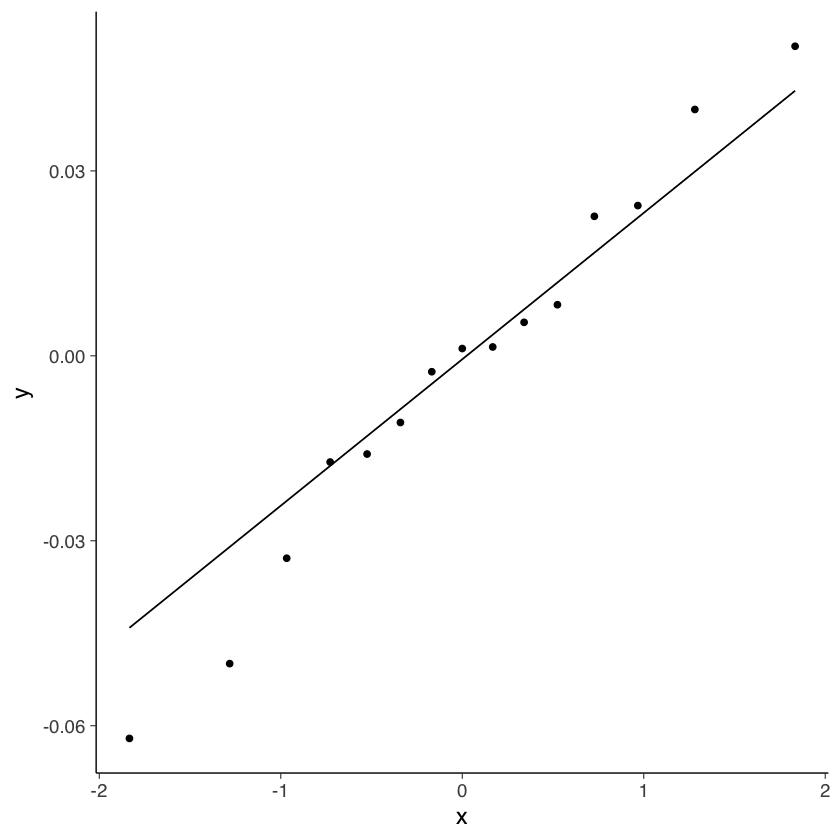

In [28]:
res1 <- residuals(fit1, type = "cor")$cov
res1[upper.tri(res1, diag = TRUE)] <- NA
v1 <- as.vector(res1)
v2 <- v1[!is.na(v1)]

tibble(v2) %>% 
  ggplot(aes(sample = v2)) + 
  stat_qq() + 
  stat_qq_line()

### Diagrammi di percorso

Il pacchetto `semPlot` consente di disegnare diagrammi di percorso per vari modelli SEM. La funzione `semPaths` prende in input un oggetto creato da `lavaan` e disegna il diagramma, con diverse opzioni disponibili. Il diagramma prodotto controlla le dimensioni dei caratteri/etichette, la visualizzazione dei residui e il colore dei percorsi/coefficienti. Sono disponibili queste e molte altre opzioni di controllo. 

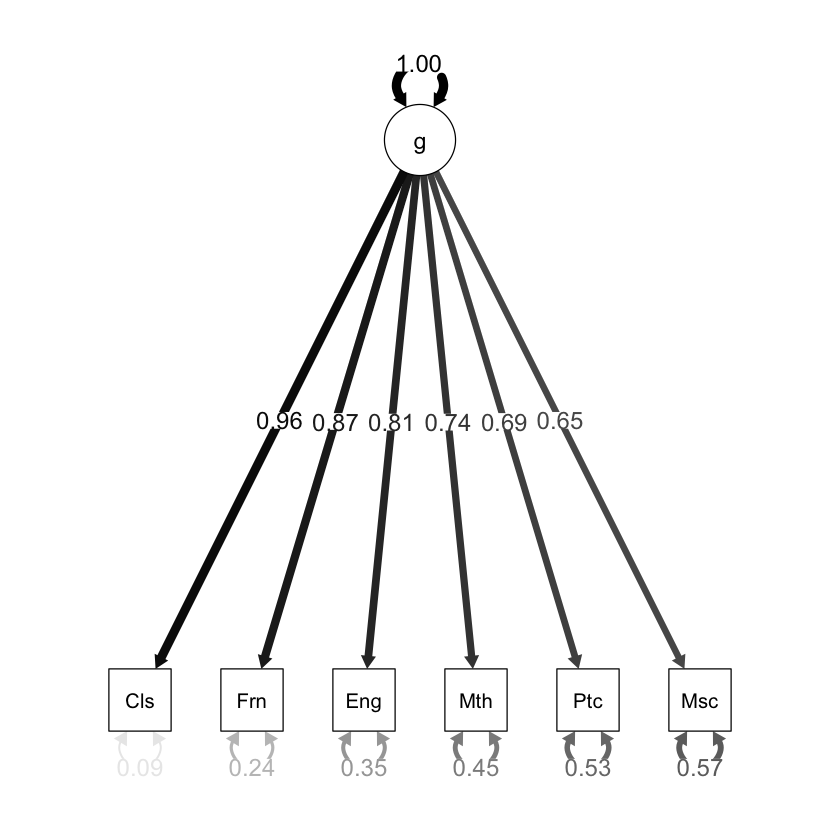

In [29]:
semPaths(
    fit1,
    "std",
    posCol = c("black"),
    edge.label.cex = 1.2,
    sizeMan = 7
)

Il calcolo delle saturazioni fattoriali con il metodo del centroide aveva prodotto il seguente risultato: 

- classici (Cls): 0.97
- inglese (Eng): 0.84
- matematica (Mth): 0.73
- pitch discrimination (Ptc): 0.65

Si noti la somiglianza con i valori ottenuti mediante il metodo di massima verosimiglianza riportati nella figura.

### Analisi fattoriale esplorativa

Quando abbiamo un'unica variabile latente, l'analisi fattoriale confermativa si riduce al caso dell'analisi fattoriale esplorativa. Esaminiamo qui sotto la sintassi per l'analisi fattoriale esplorativa in `lavaan`. 

Specifichiamo il modello.

In [30]:
efa_model <- '
    efa("efa")*g =~ Classics + French + English + Math + Pitch + Music
'

Adattiamo il modello ai dati.

In [31]:
fit2 <- lavaan::cfa(
  efa_model,
  sample.cov = spearman_cor_mat,
  sample.nobs = n,
  std.lv = TRUE
)

Esaminiamo la soluzione ottenuta.

In [32]:
out = summary(fit2, standardized = TRUE)
print(out)

lavaan 0.6.17 ended normally after 3 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        12

  Rotation method                       GEOMIN OBLIQUE
  Geomin epsilon                                 0.001
  Rotation algorithm (rstarts)                GPA (30)
  Standardized metric                             TRUE
  Row weights                                     None

  Number of observations                            33

Model Test User Model:
                                                      
  Test statistic                                 2.913
  Degrees of freedom                                 9
  P-value (Chi-square)                           0.968

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Latent Variables:
   

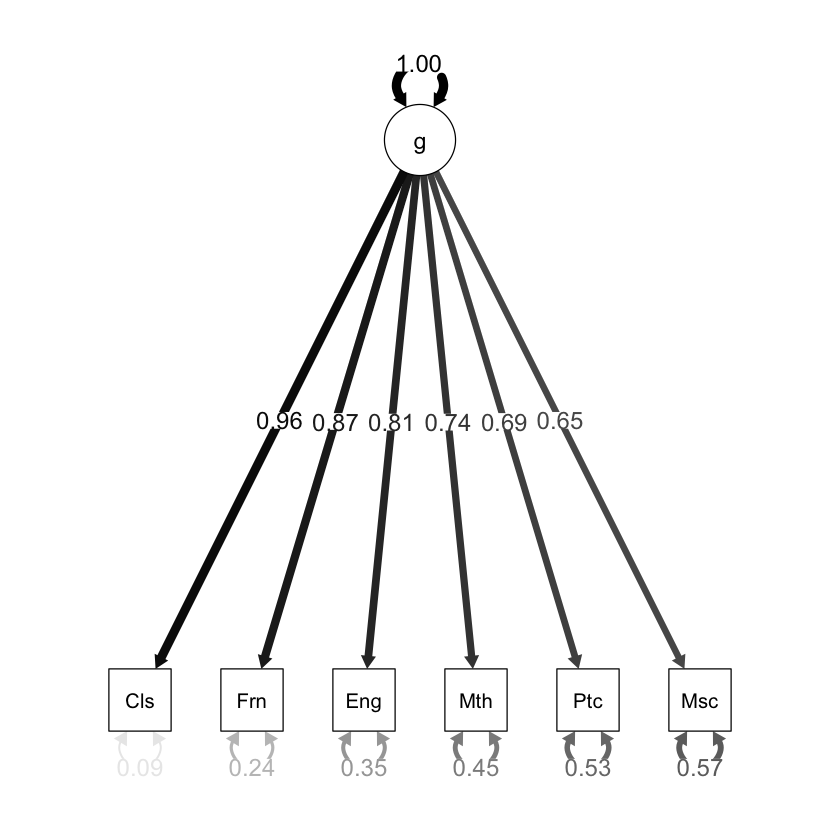

In [33]:
semPaths(
    fit2,
    "std",
    posCol = c("black"),
    edge.label.cex = 1.2,
    sizeMan = 7
)

## Conclusioni

Nel presente capitolo abbiamo introdotto il metodo dell'annullamento
della tetrade che consente di stimare le saturazioni di un modello
monofattoriale. Abbiamo anche visto che il metodo dell'annullamento
della tetrade non è altro che un'applicazione della correlazione
parziale.

Possiamo dire che un tema cruciale nella costruzione dei test
psicologici è quello di stabilire il numero di fattori/tratti che sono
soggiacenti all'insieme degli indicatori che vengono considerati. La
teoria classica dei test richiede che il test sia monofattoriale, ovvero
che gli indicatori considerati siano l'espressione di un unico tratto
latente. La violazione della monodimensionalità rende problematica
l'applicazione dei principi della teoria classica dei test ai punteggi
di un test che non possiede tale proprietà. L'esame della dimensionalità
di un gruppo di indicatori rappresenta dunque una fase cruciale nel
processo di costruzione di un test e, solitamente, questo esame è
affrontato mediante l'analisi fattoriale. In questo capitolo abbiamo
presentato le proprietà di base del modello unifattoriale.



## Session Info

In [34]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Sonoma 14.4

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] corrplot_0.92     kableExtra_1.4.0  lavaanExtra_0.2.0 lavaanPlot_0.8.1 
 [5] ggokabeito_0.1.0  viridis_0.6.5     viridisLite_0.4.2 ggpubr_0.6.0     
 [9] ggExtra_0.10.1    bayesplot_1.11.1  gridExtra_2.3     patchwork_1.2.0  
[13] semTools_0.5-6    semPlot_1.1.6     lavaan_0.6-17     psych_2.4.1      
[17] scales_1.3.0      markdown_1.12     knitr_1.45        lubridate_1.9.3  
[21] forcats_1.0.0     stringr_1.5.1     dplyr_1.1.4       purrr_1.0.2      
[25] readr_2.1.